In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


In [2]:
def ReverseComplement(Pattern):
    """
    Computes the reverse complement of a DNA Patternuence
    ------
    Inputs: 
    ------
    Pattern(string): A nucleotide Patternuence for which the reverse complement
    strand is to be determined, direction is 5' to 3'
    ------
    Outputs:
    -------
    rev_compl(string): A nucleotide Patternuence representing the reverese
    complement of the original strand.
    """
    # Convert Patternuence into the upper case letters
    Pattern = Pattern.upper()
    rev_compl = []

    for ind in range(len(Pattern)):

        if Pattern[ind] == 'A':
            rev_compl.append('T')

        elif Pattern[ind] == 'T':
            rev_compl.append('A')

        elif Pattern[ind] == 'C':
            rev_compl.append('G')

        elif Pattern[ind] == 'G':
            rev_compl.append('C')

    rev_compl.reverse()
    rev_compl_str = ''.join(map(str, rev_compl))

    return rev_compl_str



In [3]:
def SymbolToNumber(base):
    """
    Transforms the base into respective integer:
    A -> 0
    C -> 1
    G -> 2
    T -> 3
    -------
    Inputs:
    -------
    base(string): A nucleotide that is last in the string of nucleotides to be transformed
    -------
    Outputs:
    -------
    A number corresponding to the given base.
    """
    
    # Define a simple dictionary of bases and select one usint get() method
    # for Python dictionary
    base_dict = {'A':0, 'C':1, 'G':2, 'T':3}
    return base_dict.get(base)

def PatternToNumber(Pattern):
    """
    Computes the frequency array
    ------
    Inputs: 
    ------
    Pattern(string): A nucleotide sequence for which the frequency array
    is to be determined
    ------
    Outputs:
    -------
    Integer with the lexicographic position of the given k-mer.
    """
    # If pattern contains no symbols return zero
    if Pattern == "":
        return 0
    
    # Get the terminal nucleotide
    symbol = Pattern[-1]
    # Get the previous pattern
    prefix = Pattern[:-1]

    return 4*PatternToNumber(prefix) + SymbolToNumber(symbol)

In [4]:
def NumberToPattern(index, k):
    """
    Returns the nucleotide sequence at position index,
    given the length of the k-mer 'k'.
    ------
    Inputs: 
    ------
    index(int): position of the nucl. seq. in the frequency array
    k(int): length of the desired k-mer
    ------
    Outputs:
    -------
    seq(string): the nucleotide sequence of the lexicographically
    ordered k-mers at the position index.
    """
    # Initialize the empty variables
    kmer_list = list(range(4**(k)))

    # Make all the permutations of length of Pattern using the nucleotides
    kmer_list = [''.join(map(str, i)) for i in itertools.product(['A','C','T','G'], repeat=k)]

    # Sort the list lexicographically
    kmer_list.sort()


    # Get the nucleotide at the given position
    # indexing from 0
    seq = kmer_list[index]

    return seq

In [59]:
def Skew(genome):
    """
    Computes the skew for the given nucleotide sequence.
    This can help us to determine the position of ori in the genome, as 
    the ori is located at the minimum skew.
    ------
    Inputs:
    - genome(str): The input nucleotide sequence for which skew is to be computed.
    ------
    Outputs:
    - skew_list(list): A list of the skews for the sequence,
      assuming that skew at the initial position in the genome is zero.
    """
    
    # Define list of zeros for skew
    skew_list = [0]* (len(genome)+1)
    
    # Iterate over the genome
    for i in range(1,len(genome)+1):
        if genome[i-1] == "A" or genome[i-1] == "T":
            skew_list[i] = skew_list[i-1]
        elif genome[i-1] == "G":
            skew_list[i] = skew_list[i-1] + 1
        elif genome[i-1] == "C":
            skew_list[i] = skew_list[i-1] - 1
    
#     print(*skew_list, sep=" ")
    return skew_list

def MinSkew(genome):
    """
    Finds the positions of the minimum skew in the given nucleotide sequence.
    This essentially provides a way to find the ori, as the ori is located
    at the position where we traverse from reverse half-strand (ter to ori, 
    skew decreasing) to forward half-strand (skew increasing).
    ------
    Inputs:
    - genome(str): The input nucleotide sequence for which skew is to be computed.
    ------
    Outputs:
    - min_ind(list): A list of the indices in the list of skew,
    where the skew is minimum.
    """
    
    # Get the list of skews
    skew_list = Skew(genome)
    
    # Find the indicies of the minimum skew
    minimum = min(skew_list)
    
    min_ind = [i for i, v in enumerate(skew_list) if v == minimum]
    
    return min_ind
    

def PlotSkew(genome, title_str="Skew vs. Position"):
    """
    Plots the skew as the function of distance from the linearized first base.
    ------
    Inputs:
    - genome(str): The input nucleotide sequence for which skew is to be computed.
    ------
    Outputs:
    None
    """
    
    # Get the list of skews for the given nucleotide seq.
    skew_list = Skew(genome)
    
    # Find the indices of the minimum skew
    min_skew = MinSkew(genome)

    # Get the values of the minimum skew
    min_vals = [skew_list[j] for j in min_skew]
    
    # Get the positions in the sequence
    positions = list(range(len(genome)+1))    
    
    # Plot the skew
    fig, ax = plt.subplots(figsize=(10,4))
    ax.plot(positions, skew_list, color="black")
    ax.scatter(min_skew, min_vals, color="red")
    # Some graphical styling
    ax.set_xlabel('Position', fontsize=20)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_ylabel('Skew', fontsize=20)
    ax.set_title(title_str, fontsize=25)
    # Set the plot
    
    return None
    

The list of positions with minimum skew: 
 [8281, 8282, 8286, 8287, 8288, 8289, 8290, 8291, 8303, 13242, 13243]


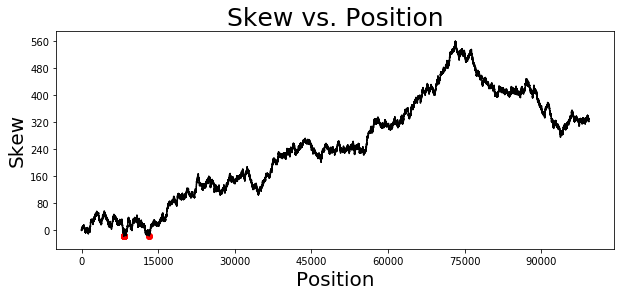

In [6]:
# Load the dataset for the minimum skew search and for skew diagram
with open('data/min_skew_data.txt', 'r') as file:
    genome = file.read().replace('\n','')
    
# Get the list of skews
skew_list = Skew(genome)

# Find the minimum skew
min_skew_ind = MinSkew(genome)
print("The list of positions with minimum skew: \n", min_skew_ind)

# Plot the skew diagram
PlotSkew(genome)

In [7]:
def HammingDistance(str_p, str_q):
    """
    Finds the Hamming Distance between the strings str_p and str_q,
    which is the number of mismatches between these strings.
    We assume that strings are of equal length.
    ------
    Inputs:
    - str_p(string): first input string
    - str_q(string): second input string
    ------
    Outputs:
    - ham_dist(int): Hamming Distance between the input strings
    """
    
    # Check if the strings are of equal length
    if len(str_p) != len(str_q):
        raise Exception("The input strings need to be of the same length!")
    
    # Convert strings to the uppercase letters
    str_p.upper()
    str_q.upper()
    
    # Initialize the Hamming distance
    ham_dist = 0
    
    # Loop over the strings
    for i in range(len(str_p)):
        if str_p[i] != str_q[i]:
            ham_dist += 1
    return ham_dist

In [8]:
# Read in the data for the Hamming distance to the list of strings
with open('data/ham_dist_data.txt', 'r') as f:
    content = f.readlines()

# Strip the newline character in each string
content = [x.strip() for x in content]

# Define the two sequences
seq_p = content[0]
seq_q = content[1]

# Get the Hamming Distance between the strings
ham_dist = HammingDistance(seq_p, seq_q)
ham_dist

765

In [9]:
def ApproxPatternMatching(Pattern, Text, d):
    """
    Searches for all the occurences of the substring Pattern within the string Text
    with at most d mismatches, i. e. approximately matches the pattern to substring in text.
    ------
    Inputs: 
    - Pattern(string): The substring that is being searched for
    - Text(string): The string in which we search for the Pattern
    - d(int): Maximum number of mismatches
    ------
    Outputs:
    AppMatPattern(string): All starting positions where Pattern appears as a substring 
    of Text with at most d mismatches.
    """
    
    # Define empty list of indices
    AppMatPattern = []
    
    # Get the length of the Pattern and Text
    lenP = len(Pattern)
    lenT = len(Text)
    
    # Loop over the Text to check the approx. match of the pattern with text
    for i in range(lenT+1-lenP):
        # Get the corresponding substring of the Text
        Text_Pat = Text[i:i+lenP]
        
        # Compute the Hamming Distance and check if it
        # is les or equal to maximum number of mismatches,
        # in such case, append
        ham_dist = HammingDistance(Pattern, Text_Pat)
        if ham_dist <= int(d):
            AppMatPattern.append(i)
    
    return AppMatPattern
    

In [97]:
Pat = "ATTCTGGA"
Text = "CGCCCGAATCCAGAACGCATTCCCATATTTCGGGACCACTGGCCTCCACGGTACGGACGTCAATCAAAT"
d = 3

apat_ind = ApproxPatternMatching(Pat, Text, d)
print(*apat_ind)

6 7 26 27


In [11]:
# Read in the data for the approximate pattern matching to the list of strings, line by line
with open('data/app_pat_match_data.txt', 'r') as f:
    data = f.readlines()

# Strip the newline character in each string
data = [x.strip() for x in data]

# Define the inputs
Pat = data[0]
Text = data[1]
d = int(data[2])

# Do the approximate pattern matching
apat_ind = ApproxPatternMatching(Pat, Text, d)
print(*apat_ind)

276 353 355 381 534 661 697 935 1211 1230 1355 1374 1410 1711 1989 2003 2878 2932 3036 3082 3166 3240 3252 3464 3602 3879 3965 4106 4491 4536 4537 4825 5154 5261 5532 6472 6727 7078 7298 7321 7323 7574 7720 8124 8141 8313 8510 8763 8764 8778 8932 9395 9556 9899 10069 10478 10610 10916 11041 11088 11126 11485 11536 11537 11715 11772 11886 12182 12234 12418 12655 12656 12784 12846 12847 12893 12902 13373 13596 13647 13811 13831 14227 14550 14622 14918 15042 15478 15494 15613 15676 15852 16007 16271 16469 16481 16501 16559 16654 16781 16899


In [12]:
def ApproxPatternCount(Pattern, Text, d):
    """
    Computes the number of occurences of the Pattern in the Text
    with at most d mismatches.
    ------
    Inputs: 
    - Pattern(string): The substring that is being searched for
    - Text(string): The string in which we search for the Pattern
    - d(int): Maximum number of mismatches
    ------
    Outputs:
    AppMatCount(int): Number of occurences of the Pattern in the Text
    with at most d mismatches.
    """
    AppPatInd = ApproxPatternMatching(Pattern, Text, d)
    AppPatCount = len(AppPatInd)
    
    return AppPatCount

In [13]:
# Read in the data for the approximate pattern count to the list of strings, line by line
with open('data/app_pat_count_data.txt', 'r') as f:
    data = f.readlines()

# Strip the newline character in each string
data = [x.strip() for x in data]

# Define the inputs
Pat = data[0]
Text = data[1]
d = int(data[2])

# Do the approximate pattern matching
count = ApproxPatternCount(Pat, Text, d)
print(count)

5


In [14]:
def MismatchedFrequentWords(Text, k, d):
    """
    Find the most frequent k-mer with at most d mismatches in the string Text.
    -------
    Inputs:
    - Text(string): A string in which the k-mers are searched for. 
    - k(int): The length of the k-mer
    - d(int): The maximum number of mismatches
    ------
    Outputs:
    - MisFreqKmers(list): All most frequent k-mers with up to d mismatches in Text
    """
    
    # Define the empty list of most frequent kmers
    MisFreqKmers = []
    
    # Define the empty list of counts
    Counts = []
    
    # Define empty list of kmers in the dictionry
    kmers_list = []
    # Define empty dictionary of kmers
    kmers_dict = {}
    
    # Loop over the text to check
    for i in range(len(Text)+1-k):
        
        Pattern = Text[i:i+k]
        Counts.append(ApproxPatternCount(Pattern, Text, d))  
        
    # Get the maximum number of counts 
    maxCounts = max(Counts)    
    maxIndex = [i for i, e in enumerate(Counts) if e == maxCounts]
    
    for i in range(len(maxIndex)):
        index = maxIndex[i]
        kmer = Text[index:index+k]
        MisFreqKmers.append(kmer)
        
    return sorted(set(MisFreqKmers))
    
    

In [15]:
Text = "ACGTTGCATGTCGCATGATGCATGAGAGCT"
k = 4
d = 1
MisFreqKmers = MismatchedFrequentWords(Text, k, d)
MisFreqKmers

['ATGC', 'ATGT', 'GATG']

In [16]:
def ImmediateNeighbors(Pattern):
    """
    Generate the 1-neighborhood, the set of all k-mers whose Hamming distance from Pattern does not 
    exceed 1.
    ------
    Inputs:
    - Pattern(string): The sequence for which the neighborhood should be generated
    ------
    Outputs:
    - Neighborhood(string): Set of all k-mers with length of Pattern that have a
    Hamming distance of 1 from the original pattern. 
    """
    
    # Define the list of neighborhood, which initially consists of only string Pattern
    Neighborhood = [Pattern]
    
    # Define the list of bases
    bases = ['A','C','G','T']
    
    # Loop over the length of Pattern
    for i in range(len(Pattern)):
        # Pick a nucleotide from the pattern
        symbol = Pattern[i]
        
        # Loop over all the bases,
        # for all the bases except of original one, replace the original nucleotide 
        # with this base and append it to the list of neighbors
        for j in range(len(bases)):
            if bases[j] != symbol:
                Neighbor = Pattern[:i] + bases[j] + Pattern[(i+1):]
                Neighborhood.append(Neighbor)
                
    return Neighborhood

In [17]:
Pat = "AA"
Neighborhood = ImmediateNeighbors(Pat)
Neighborhood

Pat1 = "AGCT"
print(Pat1[1:])

GCT


In [18]:
def Neighbors(Pattern, d):
    """
    Generate the d-neighborhood, the set of all k-mers whose Hamming distance from Pattern does not 
    exceed d.
    ------
    Inputs:
    - Pattern(string): The sequence for which the neighborhood should be generated
    - d(int): Maximum umber of mismatches allowed
    ------
    Outputs:
    - Neighborhood(string): Set of all k-mers with length of Pattern whose
    Hamming distance does not exceed d from the original pattern. 
    """
    
    # Make sure that d is integer
    d = int(d)
    
    # Define the list of bases
    bases = ['A', 'C', 'G', 'T']
    
    Neighborhood = []
    
    # If number of allowed discrepancies is 0,
    # return only the input pattern
    if d == 0:
        return [Pattern]
    
    # If length of pattern is 1, 
    # return simply all the possible bases
    if len(Pattern) == 1:
        return bases
    
    # Define the empty list of Neighborhood for the given Pattern
    # with up to d discrepancies when compared to Pattern
    Neighborhood = []
    
    # Define the suffix, which removes the first nucleotide from the sequence
    Suffix = Pattern[1:]
    
    # Get the first symbol of the string Pattern
    FirstSymbol = Pattern[0]
    
    # Get the first symbol of the pattern
    # Recursively deifne the neighborhood of the suffix (with removed first letter)
    SuffixNeighbors = Neighbors(Suffix, d)
    
    # Loop over the Suffix neighbors
    for ind, text in enumerate(SuffixNeighbors):
        ham_dist = HammingDistance(Suffix, text)
        
        if ham_dist < d:
            for x in bases:
                Neighbor = x + text
                Neighborhood.append(Neighbor)
        
        else:
            Neighborhood.append(FirstSymbol+text)
    
    return sorted(Neighborhood)

In [19]:
# Check the Neighbors script on the extra dataset
with open('data/Neighbors.txt', 'r') as file:
    data = file.readlines()

# Strip the newline character in each string
data = [x.strip() for x in data]

# Get the input variables and output variable
Input = str(data[1])
d = data[2]
Output = sorted(data[4:])

# Run the Neighbors function to get all the neighbors of the pattern
Nhood = Neighbors(Input, d)

# Compare the model output and the output of the Neighbors function
# Should return empty list if working properly
cross_check = [string for string in Output if string not in Nhood]
print(cross_check)
# Works well! 

[]


In [20]:
# Check the Neighbors script on the assignment dataset
with open('data/Neighbors_test.txt', 'r') as file:
    data = file.readlines()

# Strip the newline character in each string
data = [x.strip() for x in data]

# Get the input variables and output variable
Input = str(data[0])
d = data[1]

# Run the Neighbors function to get all the neighbors of the pattern
Nhood = Neighbors(Input, d)

with open('data/solution_Neighbors_test.txt', mode='w') as myfile:
    myfile.write('\n'.join(Nhood))

In [21]:
def FrequentWordsWithMismatches(Text, k, d):
    """
    Finds the most frequent k-mers with up to d mismatches in a string Text.
    ------
    Inputs:
    - Text(string): A sequence in which k-mers are searched for.
    - k(int): Length of the k-mers that are searched for
    - d(int): Maximum number of mismatches
    ------
    Outputs:
    - FrequentPatterns(list): The list of the most frequent k-mers with up to d mismatches
    in a string Text
    """
    
    # Initialize an empty list of FrequentPatterns
    FrequentPatterns = []
    
    # Initialize the empty list of neighborhoods
    Neighborhoods = []
    
    # Loop over the length of the text
    for i in range(len(Text)+1-k):
        
        # Get each substring of the Text with length k
        # and append its neighbors to the list
        Pattern = Text[i:i+k]
        Neighborhoods.append(Neighbors(Pattern, d))
    
    # Form an array that holds all the strings in the neighborhoods,
    # simply flatten the Neighborhoods
    NeighborhoodsArray = [item for sublist in Neighborhoods for item in sublist]
    
    # Define lists of Count and Index
    Index = [0]*len(NeighborhoodsArray)
    Count = [0]*len(NeighborhoodsArray)
    
    # Loop over the NeighborhoodsArray and count the patterns
    for i in range(len(NeighborhoodsArray)):
        Pattern = NeighborhoodsArray[i]
        # For each pattern get its position in the Frequency Array
        Index[i] = PatternToNumber(Pattern)
        Count[i] = 1
    
    # Sort the Indices in an increasing order
    SortedIndex = sorted(Index)

    # Loop over the NeighborhoodsArray and if the neighboring 
    # indices have the same position, increment the counter
    for i in range(len(NeighborhoodsArray)-1):
        if SortedIndex[i] == SortedIndex[i+1]:
            Count[i+1] = Count[i] + 1
    
    # Get the maximum value in the array of counts
    maxCount = max(Count)
    
    # Loop over the array and only append the Patterns 
    # for which the count is equal to maxCount
    for i in range(len(NeighborhoodsArray)):
        if Count[i] == maxCount:
            Pattern = NumberToPattern(SortedIndex[i], k)
            FrequentPatterns.append(Pattern)

    return sorted(FrequentPatterns)       

In [22]:
# Check the FrequentWordsWithMismatches script on the assignment dataset
with open('data/frequent_kmers_data.txt', 'r') as file:
    data = file.readlines()

# Strip the newline character in each string
data = [x.strip() for x in data]

# Get the input variables
Input = str(data[0])
scalars = str(data[1])
k = int(scalars[0])
d = int(scalars[2])

# Run the Neighbors function to get all the neighbors of the pattern
FrequentKmers = FrequentWordsWithMismatches(Input, k, d)

with open('data/solution_FreqWordsMismatches.txt', mode='w') as myfile:
    myfile.write('\n'.join(FrequentKmers))

In [26]:
def FrequentWordsWithMismatchesAndRevCompl(Text, k, d):
    """
    Finds the most frequent k-mers with up to d mismatches and reverse complements
    in a string Text.
    ------
    Inputs:
    - Text(string): A sequence in which k-mers are searched for.
    - k(int): Length of the k-mers that are searched for.
    - d(int): Maximum number of mismatches.
    ------
    Outputs:
    - FrequentPatterns(list): All k-mers maximizing the sum of all the occurences of 
    the Pattern with up to d mismatches and occurences of the reverse complements of
    the Pattern with up to d mismatches.
    """
    
    # Initialize an empty list of FrequentPatterns
    FrequentPatterns = []
    
    # Initialize the empty list of neighborhoods
    Neighborhoods = []

    # Loop over the length of the text
    for i in range(len(Text)+1-k):
        
        # Get each substring of the Text with length k
        # and append its neighbors to the list
        Pattern = Text[i:i+k]
        RevPattern = ReverseComplement(Pattern)
        Neighborhoods.append(Neighbors(Pattern, d))
        Neighborhoods.append(Neighbors(RevPattern, d))

    # Form an array that holds all the strings in the neighborhoods,
    # simply flatten the Neighborhoods
    NeighborhoodsArray = [item for sublist in Neighborhoods for item in sublist]
    
    # Define lists of Count and Index
    Index = [0]*len(NeighborhoodsArray)
    Count = [0]*len(NeighborhoodsArray)

    # Loop over the NeighborhoodsArray and count the patterns
    for i in range(len(NeighborhoodsArray)):
        Pattern = NeighborhoodsArray[i]
        # For each pattern get its position in the Frequency Array
        Index[i] = PatternToNumber(Pattern)
        Count[i] = 1
    
    # Sort the Indices in an increasing order
    SortedIndex = sorted(Index)

    # Loop over the NeighborhoodsArray and if the neighboring 
    # indices have the same position, increment the counter
    for i in range(len(NeighborhoodsArray)-1):
        if SortedIndex[i] == SortedIndex[i+1]:
            Count[i+1] = Count[i] + 1
    
    # Get the maximum value in the array of counts
    maxCount = max(Count)
    
    # Loop over the array and only append the Patterns 
    # for which the count is equal to maxCount
    for i in range(len(NeighborhoodsArray)):
        if Count[i] == maxCount:
            Pattern = NumberToPattern(SortedIndex[i], k)
            FrequentPatterns.append(Pattern)

    return sorted(FrequentPatterns)

In [27]:
# Check the FrequentWordsWithMismatches script on the assignment dataset
with open('data/freq_kmers_mismatch_data.txt', 'r') as file:
    data = file.readlines()

# Strip the newline character in each string
data = [x.strip() for x in data]

# Get the input variables
Input = str(data[0])
scalars = str(data[1])
k = int(scalars[0])
d = int(scalars[2])

# Run the Neighbors function to get all the neighbors of the pattern
FrequentKmersMismatch = FrequentWordsWithMismatchesAndRevCompl(Input, k, d)

with open('data/solution_FreqWordsMismatchesRevComp.txt', mode='w') as myfile:
    myfile.write('\n'.join(FrequentKmers))

### Searching for the DnaA box in Salmonella enterica

[3764856, 3764858]


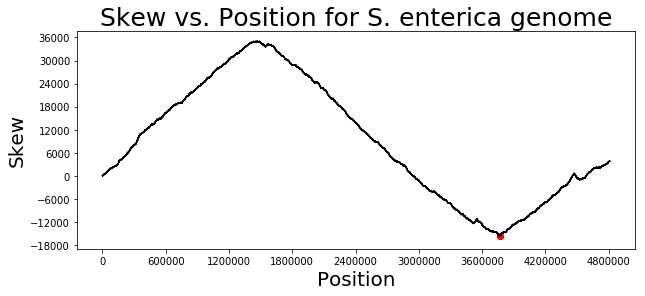

In [61]:
# Load the file with S. enterica's whole genome
with open('data/Salmonella_enterica.txt', 'r') as file:
    data = file.readlines()

# Strip the newline chracter in each string
data = [x.strip() for x in data]

# Get the sequence of S. enterica with line breaks, removing the BLAST search header
seq = data[1:]

# Remove the line breaks from the sequence
seq = str("".join(seq))

# Get the positions of the minimum skew 
min_skew_ind = MinSkew(seq)
print(min_skew_ind)
# Now plot the Skew diagram
PlotSkew(seq, title_str="Skew vs. Position for S. enterica genome")

In [96]:
# Select the section of the genome with length L centered at the estimated possible position of ori 
# in the S. enterica genome
L = 1000

# We pick the first minimum of the Skew and the part of the sequence around that minimum Skew
center = min_skew_ind[0]
min_ind = int(center-L/2)
max_ind = int(center+L/2)

# The sequence centered around the minimum skew
min_skew_seq = seq[min_ind:max_ind]

# We use the FrequentWordsWithMismatchesAndRevCompl to get the most frequent 9-mers with up to 1 mismatch
# that could be candidate DnaA boxes

# Length of the k-mers
k = 9
d = 1

# Get the list of candidate DnaA boxes
DnaA_candidates = FrequentWordsWithMismatchesAndRevCompl(min_skew_seq, k, d)
print(*DnaA_candidates, sep=" ")

TGTGGATAA TTATCCACA
